In [123]:
import numpy as np
from keras.datasets import mnist
from keras import backend as K
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


print("Before reshape:")
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


dimData = np.prod(x_train.shape[1:])
x_train = x_train.reshape(x_train.shape[0], dimData)
x_test = x_test.reshape(x_test.shape[0], dimData)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("After reshape:")
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

Before reshape:
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
After reshape:
(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


In [119]:
from keras import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(250, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="softmax"))

In [120]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [124]:
history = model.fit(x_train, y_train, epochs=15, batch_size=300, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 7s 123us/step - loss: 0.0689 - acc: 0.9819 - val_loss: 0.0921 - val_acc: 0.9719
Epoch 2/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0633 - acc: 0.9834 - val_loss: 0.0887 - val_acc: 0.9726
Epoch 3/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0585 - acc: 0.9844 - val_loss: 0.0844 - val_acc: 0.9743
Epoch 4/15
60000/60000 [==============================] - 6s 105us/step - loss: 0.0543 - acc: 0.9858 - val_loss: 0.0829 - val_acc: 0.9750
Epoch 5/15
60000/60000 [==============================] - 7s 121us/step - loss: 0.0495 - acc: 0.9872 - val_loss: 0.0795 - val_acc: 0.9758
Epoch 6/15
60000/60000 [==============================] - 8s 126us/step - loss: 0.0455 - acc: 0.9883 - val_loss: 0.0791 - val_acc: 0.9771
Epoch 7/15
60000/60000 [==============================] - 8s 132us/step - loss: 0.0418 - acc: 0.9898 - val_loss: 0.0748 - va

10000/10000 [==============================] - 2s 155us/step
Results on Test Data : Loss = 0.06912455902397632, accuracy = 0.9799


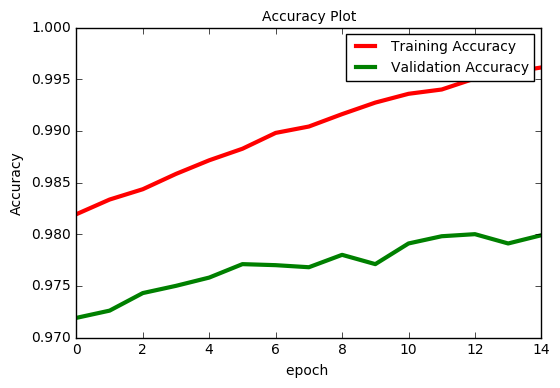

In [128]:
from matplotlib import pyplot as plt

[test_loss, test_acc] = model.evaluate(test_input, test_label)
print("Results on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###plotting the graphs for Accuracy

plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'g',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10)
plt.xlabel('epoch ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Plot',fontsize=10)

plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 219us/step - loss: 0.4121 - acc: 0.8799 - val_loss: 0.1849 - val_acc: 0.9471
Epoch 2/15
60000/60000 [==============================] - 14s 232us/step - loss: 0.1902 - acc: 0.9454 - val_loss: 0.1337 - val_acc: 0.9604
Epoch 3/15
60000/60000 [==============================] - 14s 227us/step - loss: 0.1433 - acc: 0.9583 - val_loss: 0.1050 - val_acc: 0.9680
Epoch 4/15
60000/60000 [==============================] - 14s 228us/step - loss: 0.1175 - acc: 0.9658 - val_loss: 0.0912 - val_acc: 0.9724
Epoch 5/15
60000/60000 [==============================] - 13s 218us/step - loss: 0.0986 - acc: 0.9708 - val_loss: 0.0835 - val_acc: 0.9748
Epoch 6/15
60000/60000 [==============================] - 11s 184us/step - loss: 0.0854 - acc: 0.9747 - val_loss: 0.0755 - val_acc: 0.9777
Epoch 7/15
60000/60000 [==============================] - 11s 182us/step - loss: 0.0762 - acc: 0.9780 - val_loss: 0.

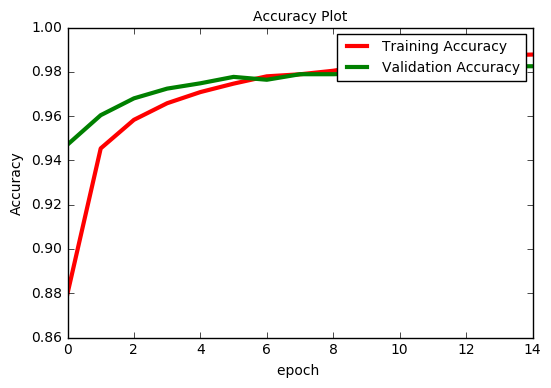

In [129]:
### Adding regularization to avoid overfitting
from keras.layers import Dropout
 
reg_model= Sequential()
reg_model.add(Dense(512, activation='relu', input_shape=(dimData,)))
reg_model.add(Dropout(0.5))
reg_model.add(Dense(10, activation='softmax'))


reg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
reg_param = reg_model.fit(tr_input, tr_label, batch_size=300, epochs=15, verbose=1, validation_data=(test_input, test_label))

[test_loss, test_acc] = reg_model.evaluate(test_input, test_label)
print("Results on Test Data : Loss = {}, accuracy = {}".format(test_loss, test_acc))

###plotting the graphs for Accuracy

plt.plot(reg_param.history['acc'],'r',linewidth=3.0)
plt.plot(reg_param.history['val_acc'],'g',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=10)
plt.xlabel('epoch ',fontsize=10)
plt.ylabel('Accuracy',fontsize=10)
plt.title('Accuracy Plot',fontsize=10)

plt.show()